<a href="https://colab.research.google.com/github/electrodrago/colab-learning/blob/main/2_image_manipulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformation

## Affine: Scaling, Rotation, Translation
## Non-affine: Projective Transform or Homography

In [1]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

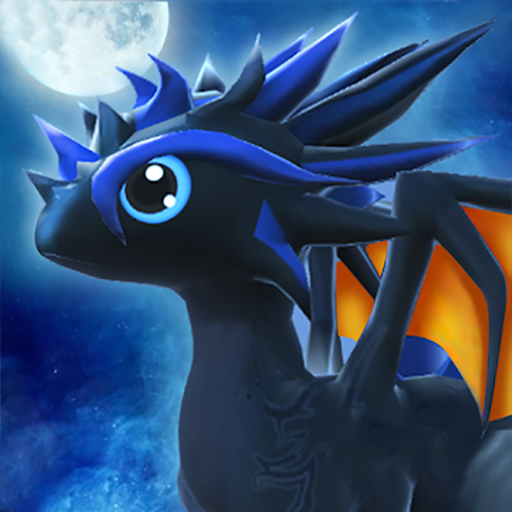

In [2]:
image = cv2.imread('/content/drive/MyDrive/DLCourse/ardragob.png')
cv2_imshow(image)

In [3]:
height, width = image.shape[:2]
q_height, q_width = height //4, width //4

### Translation

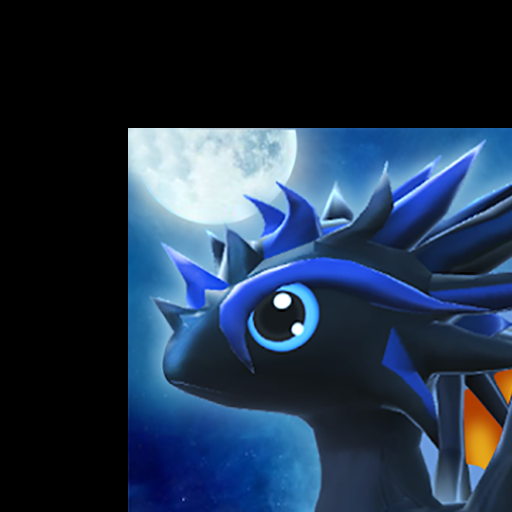

In [4]:
# T = | 1 0 Tx |
#     | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, q_width], [0, 1, q_height]])
img_translation = cv2.warpAffine(image, T, (width, height))
cv2_imshow(img_translation)

### Rotation

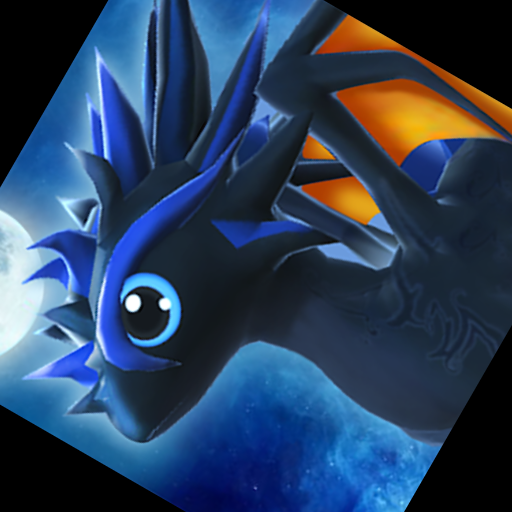

In [5]:
rotation_matrix = cv2.getRotationMatrix2D((width//2, height//2), 60, 1)

rotate_image = cv2.warpAffine(image, rotation_matrix, (width, height))
cv2_imshow(rotate_image)

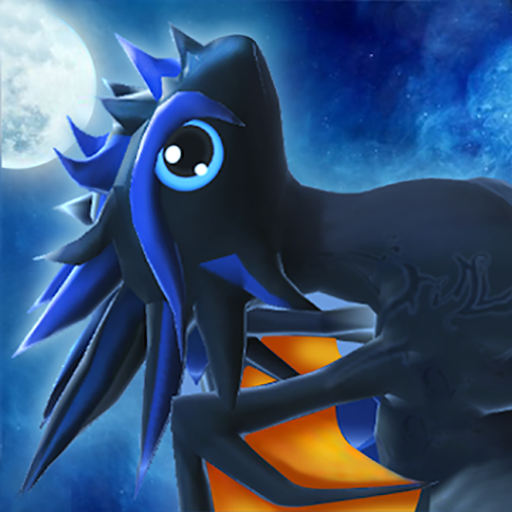

In [6]:
transpose_image = cv2.transpose(image)
cv2_imshow(transpose_image)

### Scaling, Interpolation
Interpolation is a method of constructing new data points within the range of a discrete set of known data points.

`cv2.INTER_AREA` - Good for shrinking or down sampling <br>
`cv2.INTER_NEAREST` - Fastest <br>
`cv2.INTER_LINEAR` - Good for shrinking or down sampling <br>
`cv2.INTER_CUBIC` - Better <br>
`cv2.INTER_LANCZOS4` - Best <br>

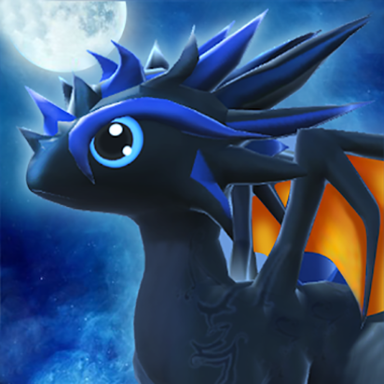

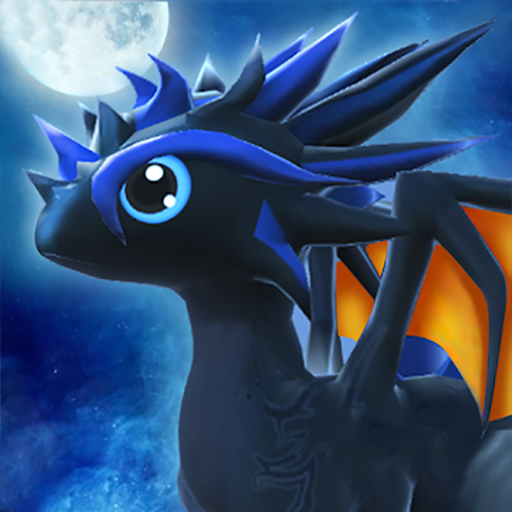

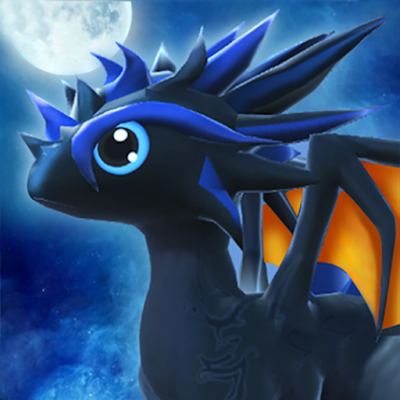

In [7]:
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
cv2_imshow(image_scaled)

image_scaled = cv2.resize(image, None, fx=1, fy=1, interpolation=cv2.INTER_CUBIC)
cv2_imshow(image_scaled)

image_scaled = cv2.resize(image, (400, 400), interpolation=cv2.INTER_AREA)
cv2_imshow(image_scaled)

## Crop

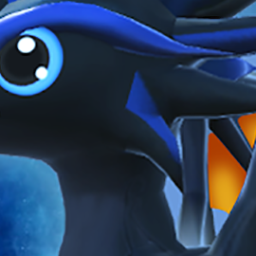

In [8]:
start_row, start_col = int(height*0.25), int(width*0.25)
end_row, end_col = int(height*0.75), int(width*0.75)

cropped = image[start_row:end_row, start_col:end_col]
cv2_imshow(cropped)

# Arithmetic Operations

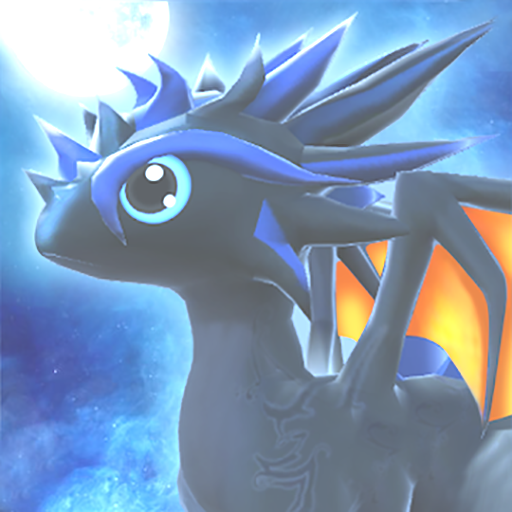

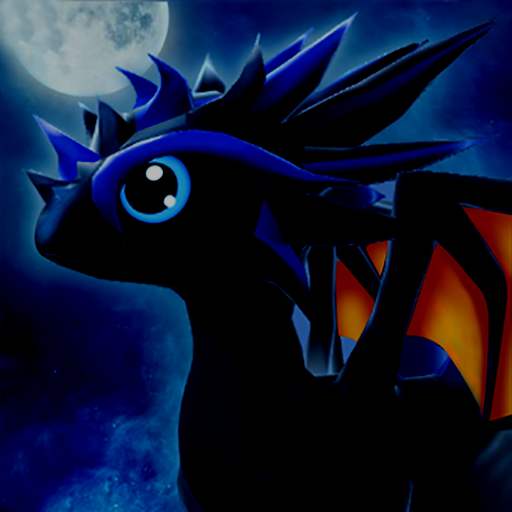

In [9]:
M = np.ones(image.shape, dtype="uint8") * 75

# Brightening
added = cv2.add(image, M)
cv2_imshow(added)

# Darkening
subtract = cv2.subtract(image, M)
cv2_imshow(subtract)

## Bitwise operation

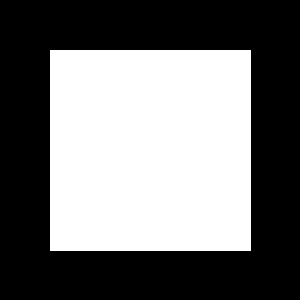

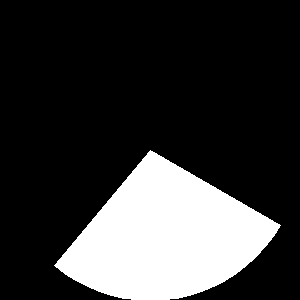

In [12]:
square = np.zeros((300, 300), np.uint8)
cv2.rectangle(square, (50, 50), (250, 250), 255, -2)
cv2_imshow(square)

ellipse = np.zeros((300, 300), np.uint8)
cv2.ellipse(ellipse, (150, 150), (150, 150), 30, 0, 100, 255, -1)
cv2_imshow(ellipse)

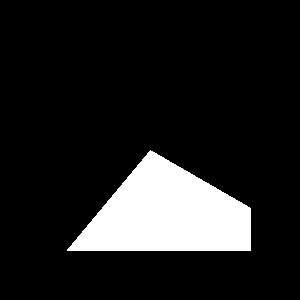

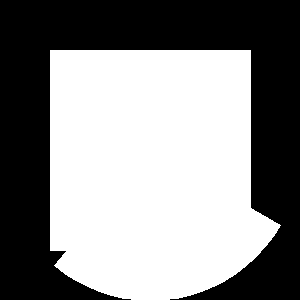

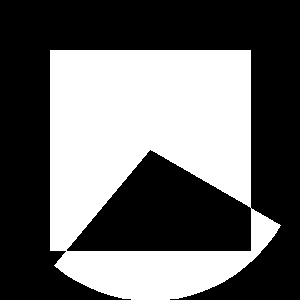

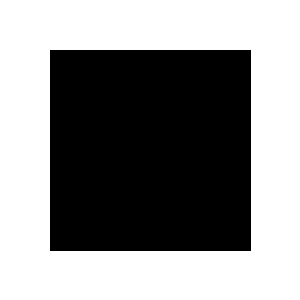

In [13]:
bitwise_and = cv2.bitwise_and(square, ellipse)
cv2_imshow(bitwise_and)

bitwise_or = cv2.bitwise_or(square, ellipse)
cv2_imshow(bitwise_or)

bitwise_xor = cv2.bitwise_xor(square, ellipse)
cv2_imshow(bitwise_xor)

bitwise_not= cv2.bitwise_not(square)
cv2_imshow(bitwise_not)

## Dilation and Erosion

Dilation add pixels to boundaries of objects in an image <br>
Erosion remove pixels <br>
Opening - Erosion followed by dilation <br>
Closing - Dilation followed by erosion

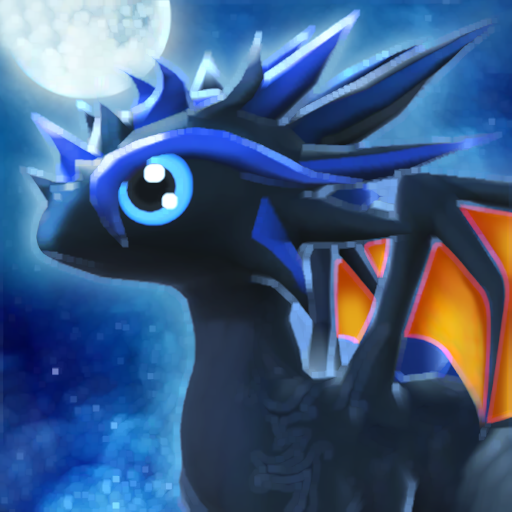

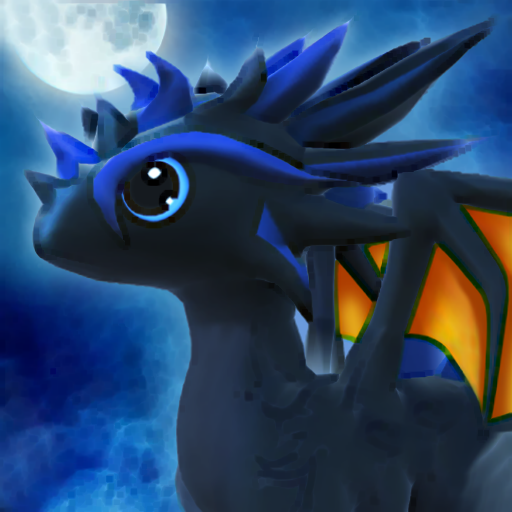

In [15]:
# Dilation
kernel = np.ones((5, 5), np.uint8)

dilation = cv2.dilate(image, kernel, iterations=1)
cv2_imshow(dilation)

# Erosiom
erosion = cv2.erode(image, kernel, iterations=1)
cv2_imshow(erosion)

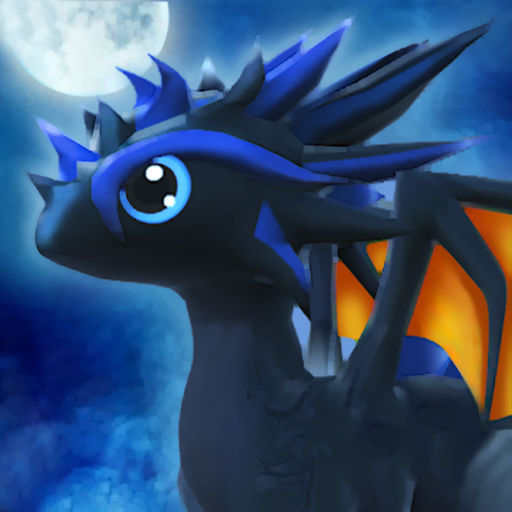

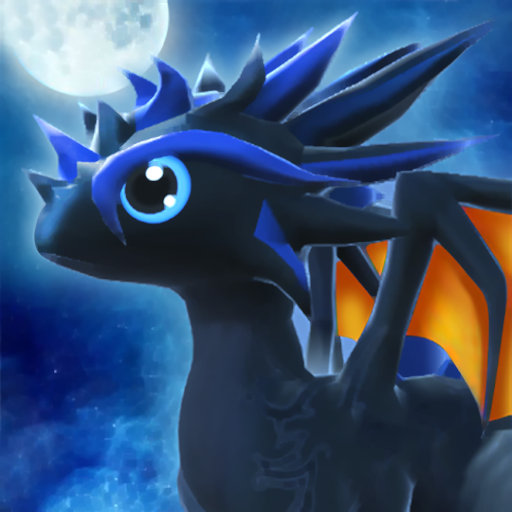

In [17]:
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
cv2_imshow(opening)

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closing)

## Edge detection & Image Gradients

Edge detection is a very importtant area in computer vision, especially when dealing with contours
<br>
Edges can be defined as sudden changes in an image and they can encode just as much information as pixels.

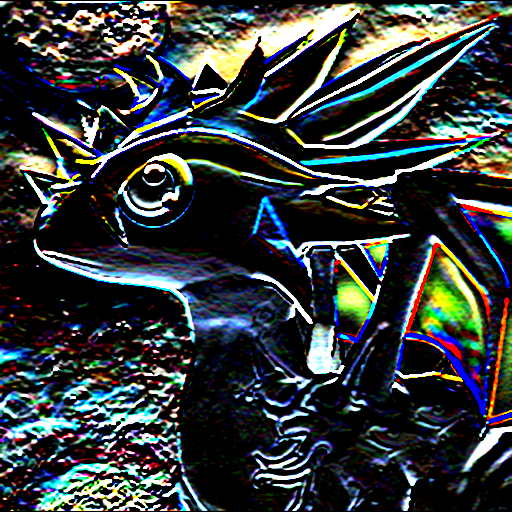

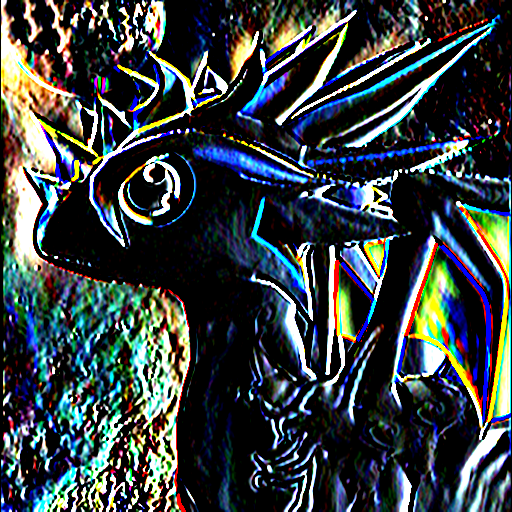

In [18]:
# Extract Sobel Edges
sobel_x = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
cv2_imshow(sobel_x)
sobel_y = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
cv2_imshow(sobel_y)

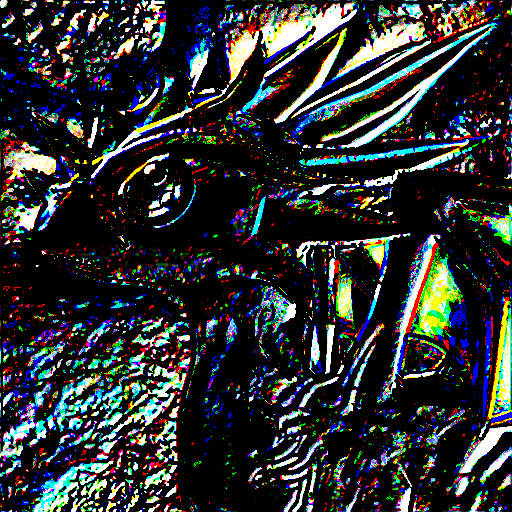

In [19]:
sobel_or = cv2.bitwise_or(sobel_x, sobel_y)
cv2_imshow(sobel_or)

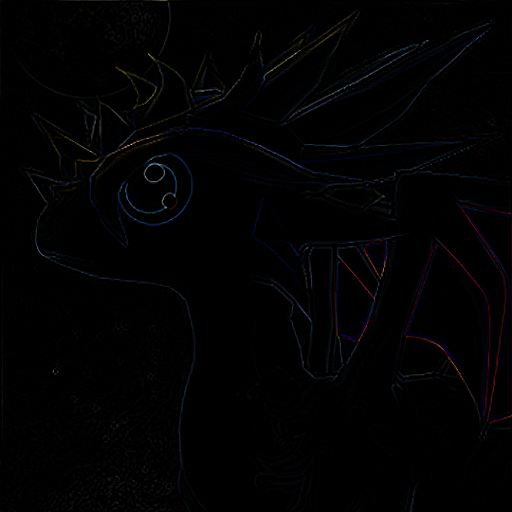

111.27976264912616


In [20]:
laplacian = cv2.Laplacian(image, cv2.CV_64F)
cv2_imshow(laplacian)
print(laplacian.var())

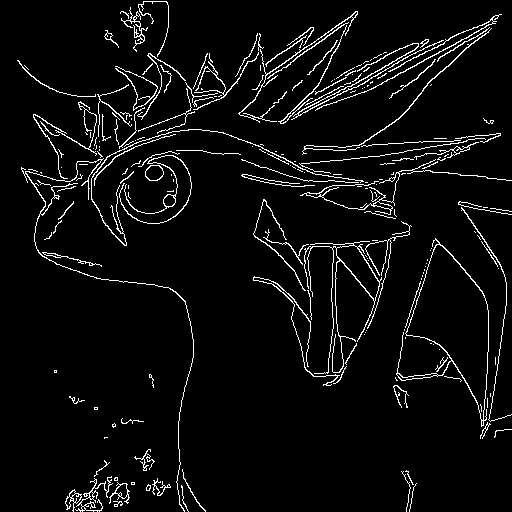

In [21]:
canny = cv2.Canny(image, 20, 170)
cv2_imshow(canny)

## Getting perspective transform


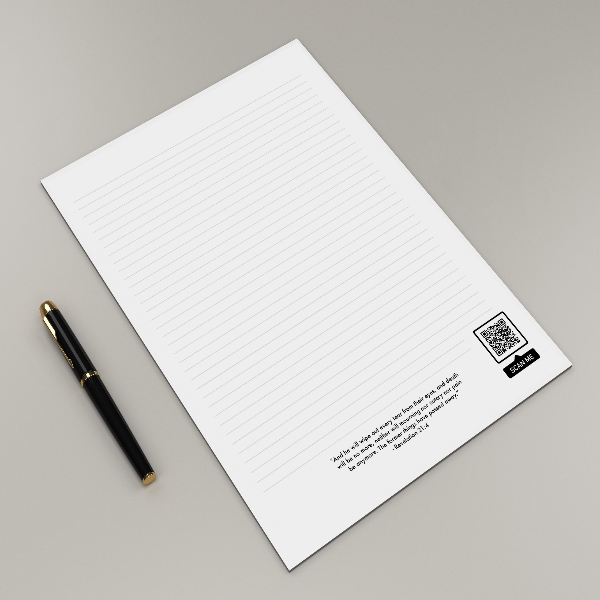

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

scan = cv2.imread("/content/drive/MyDrive/DLCourse/scan.jpg")
scan = cv2.resize(scan, (600, 600))
cv2_imshow(scan)

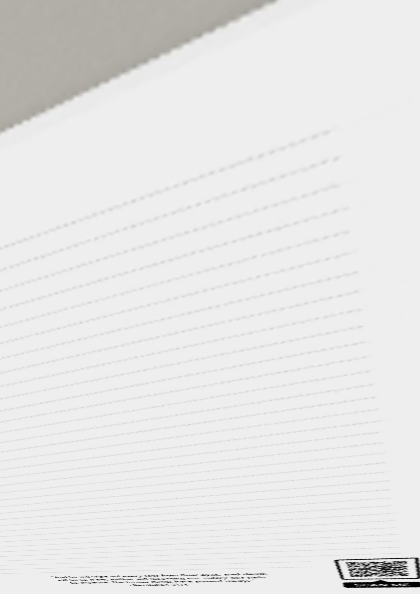

In [34]:
points_a = np.float32([[220, 50], [300, 50], [300, 550], [550, 370]])
points_b = np.float32([[0, 0], [420, 0], [0, 594], [420, 594]])

M = cv2.getPerspectiveTransform(points_a, points_b)

warp = cv2.warpPerspective(scan, M, (420, 594))
cv2_imshow(warp)